In [8]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold 
%matplotlib inline

In [9]:
data = datasets.fetch_openml(
                            'mnist_784', version=1, return_X_y=True
                            )
pixel_values, targets = data
targets = targets.astype(int)

In [10]:
type(data)

tuple

In [11]:
type(pixel_values)

pandas.core.frame.DataFrame

In [12]:
type(targets)

pandas.core.series.Series

In [13]:
pixel_values.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

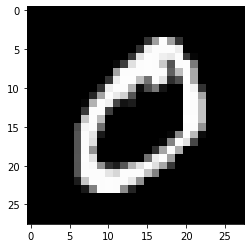

In [19]:
single_image = np.array(pixel_values.iloc[1, :]).reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [22]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(np.array(pixel_values.iloc[:3000, :]))

In [24]:
transformed_data.shape

(3000, 2)

In [25]:
type(transformed_data)

numpy.ndarray

In [26]:
# converting it to dataframe
tsne_df = pd.DataFrame(
                        np.column_stack((transformed_data, targets[:3000])),
                        columns=["x", "y", "targets"] )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [27]:
tsne_df.head()

x          y  targets
0  -5.281551 -28.952768        5
1 -26.105896 -68.069321        0
2 -42.503582  35.580391        4
3  38.893967  26.663395        1
4 -14.770573  35.433247        9

/Users/hardikkamboj/anaconda3/envs/aaamlp_env/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x720 with 0 Axes>

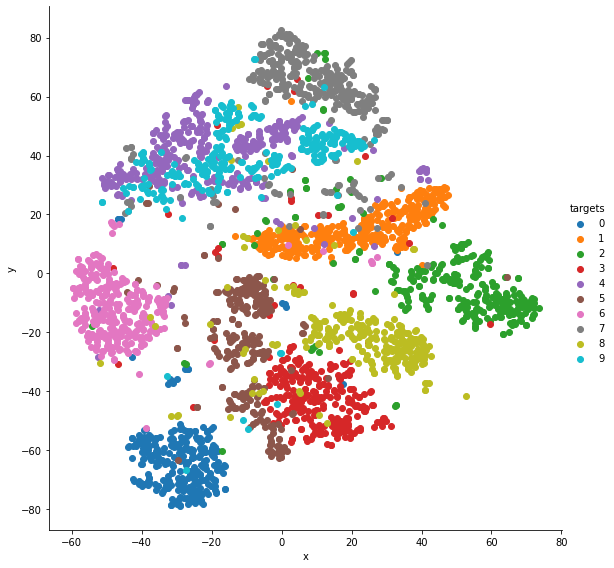

In [31]:
plt.figure(figsize = (16,10))
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()